In [1]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics, Distributions, Dierckx
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [ ]:
obs10deg10deg = CSV.read("../MPC/obs10degervation/obs10deg_10deg_10ms_EF.csv", DataFrame)
obs10deg20deg = CSV.read("../MPC/obs10degervation/obs10deg_20deg_10ms_EF.csv", DataFrame)
obs10deg35deg = CSV.read("../MPC/obs10degervation/obs10deg_35deg_10ms_EF.csv", DataFrame)

In [ ]:
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(1, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs10deg10deg[1:201,"y"]/7.0, obs10deg10deg[1:201,"x"]/7.0, "-", label="obs10degervation", c="k", alpha=0.8, linewidth=0.8)
ax.set_ylabel(L"x/L_{pp}[m]", fontsize=10)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.axis("equal")
ax.grid()

ax = fig.add_subplot(1, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs10deg20deg[1:201,"y"]/7.0, obs10deg20deg[1:201,"x"]/7.0, "-", label="obs10degervation", c="k", alpha=0.8, linewidth=0.8)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.axis("equal")
ax.grid()

ax = fig.add_subplot(1, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs10deg35deg[1:201,"y"]/7.0, obs10deg35deg[1:201,"x"]/7.0, "-", label="obs10degervation", c="k", alpha=0.8, linewidth=0.8)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.axis("equal")
ax.grid()

display(fig)

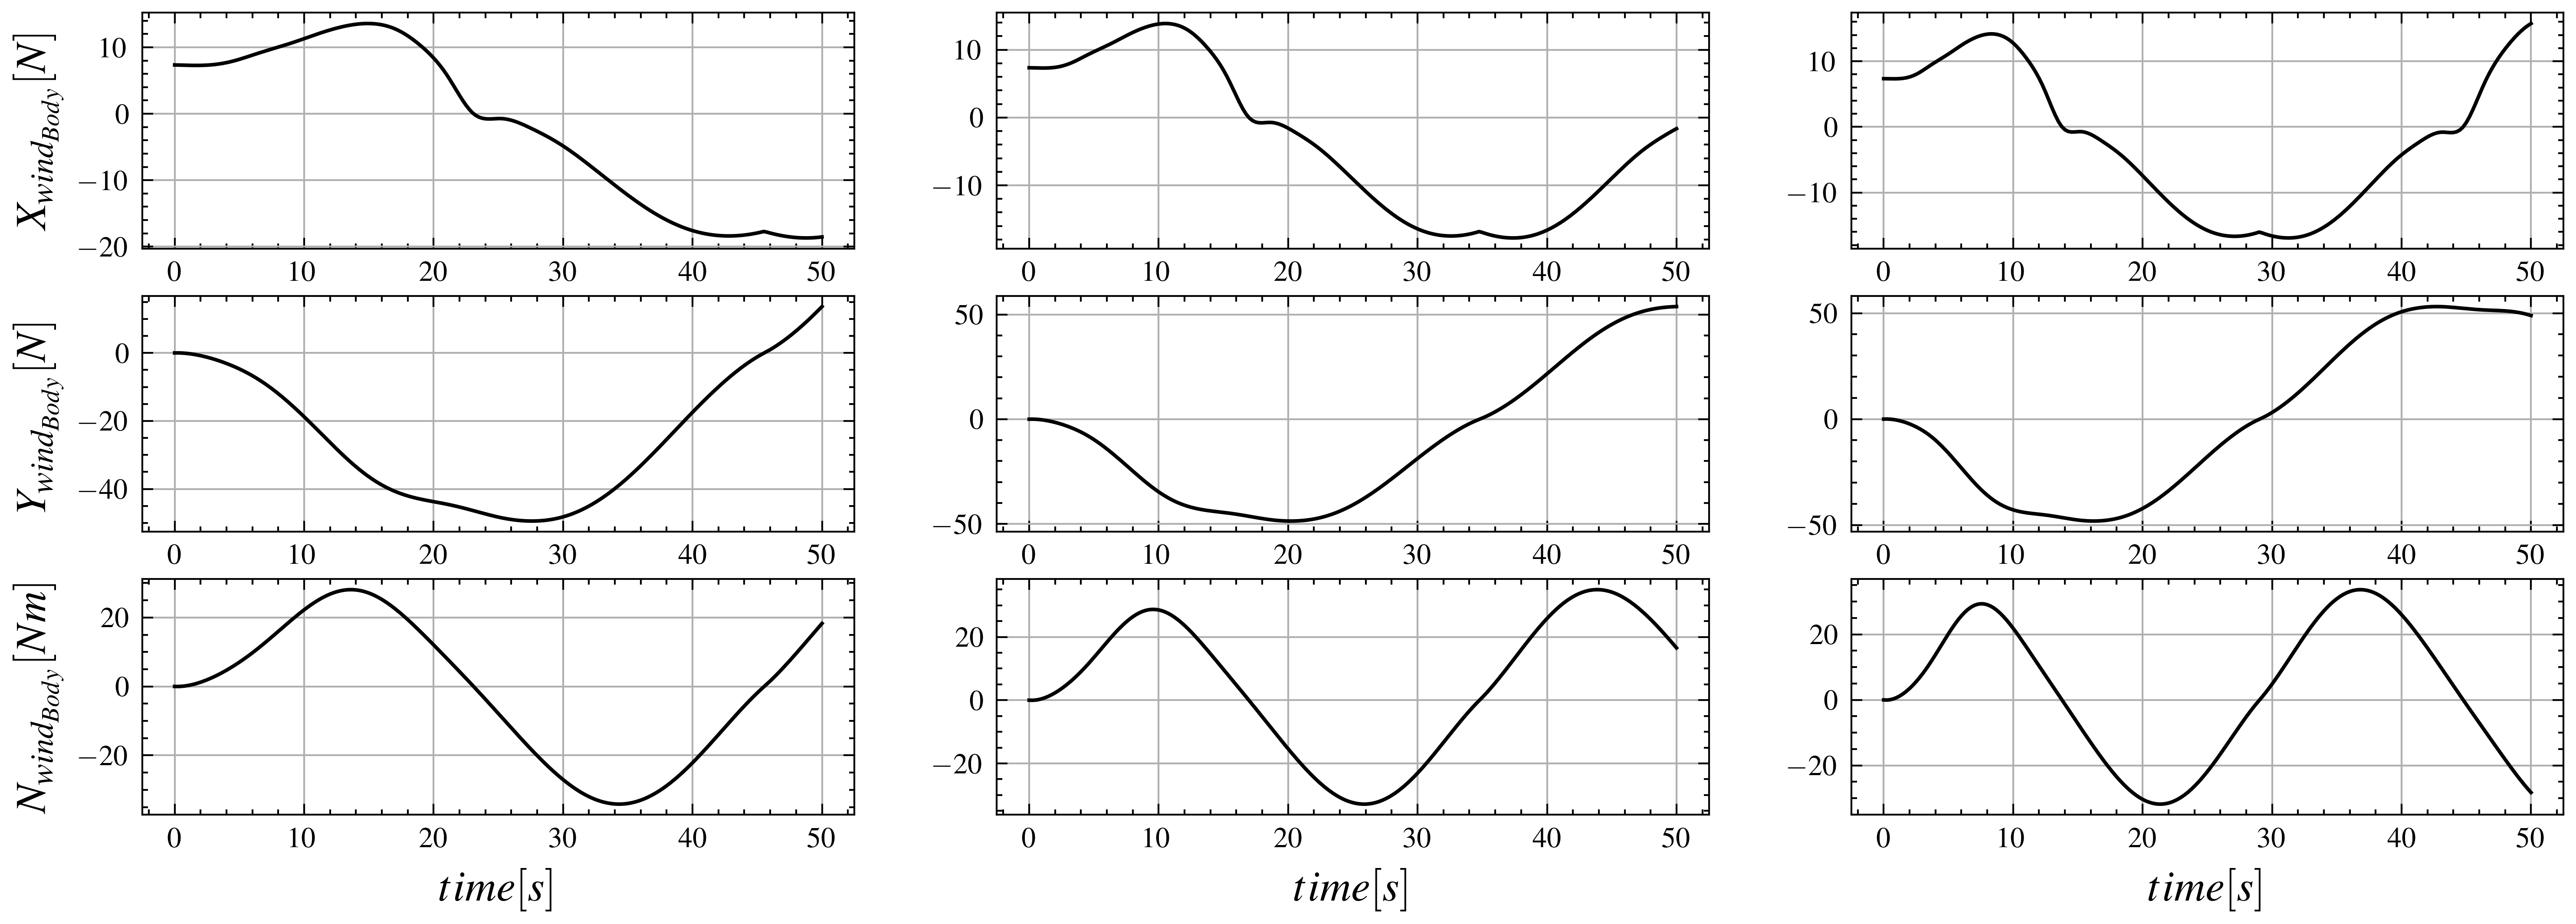

In [19]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(3, 3, 1)
ax.plot(obs10deg10deg[1:201,"time"], obs10deg10deg[1:201,"X_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"X_{wind_{Body}}[N]", fontsize=12)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 4)
ax.plot(obs10deg10deg[1:201,"time"], obs10deg10deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"Y_{wind_{Body}}[N]", fontsize=12)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 7)
ax.plot(obs10deg10deg[1:201,"time"], obs10deg10deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"N_{wind_{Body}}[Nm]", fontsize=12)
# 
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(3, 3, 2)
ax.plot(obs10deg20deg[1:201,"time"], obs10deg20deg[1:201,"X_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 5)
ax.plot(obs10deg20deg[1:201,"time"], obs10deg20deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 8)
ax.plot(obs10deg20deg[1:201,"time"], obs10deg20deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(3, 3, 3)
ax.plot(obs10deg35deg[1:201,"time"], obs10deg35deg[1:201,"X_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 6)
ax.plot(obs10deg35deg[1:201,"time"], obs10deg35deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 9)
ax.plot(obs10deg35deg[1:201,"time"], obs10deg35deg[1:201,"N_wind"], "-", c="k", linewidth=1)
# 
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()
display(fig)

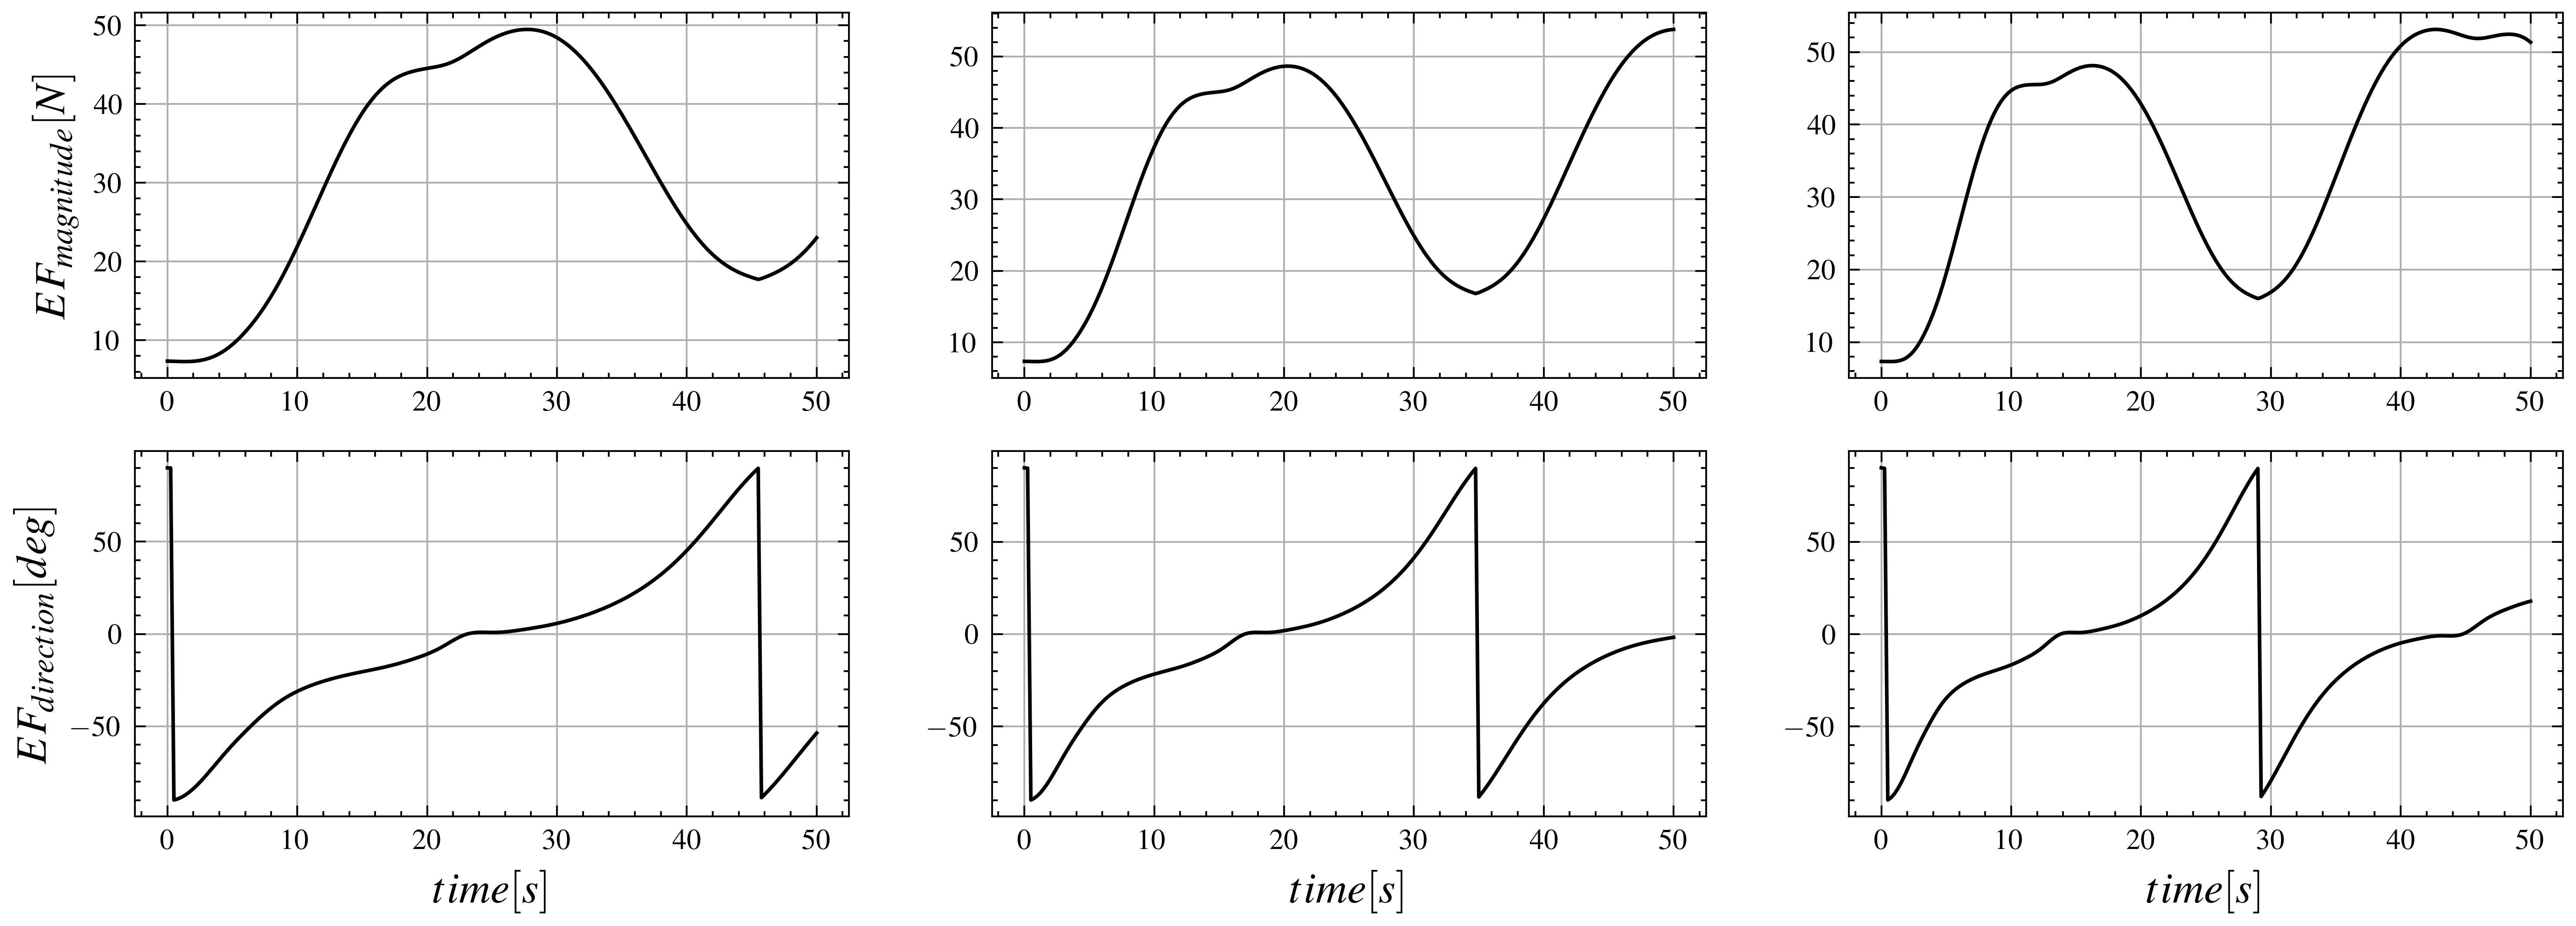

In [22]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(2, 3, 1)
ax.plot(obs10deg[1:201,"time"], sqrt.(obs10deg[1:201,"X_wind"].^2 .+ obs10deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 4)
ax.plot(obs10deg[1:201,"time"], atan.(obs10deg[1:201,"X_wind"]./obs10deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 2)
ax.plot(obs20deg[1:201,"time"], sqrt.(obs20deg[1:201,"X_wind"].^2 .+ obs20deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(2, 3, 5)
ax.plot(obs20deg[1:201,"time"], atan.(obs20deg[1:201,"X_wind"]./obs20deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 3)
ax.plot(obs35deg[1:201,"time"], sqrt.(obs35deg[1:201,"X_wind"].^2 .+ obs35deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(2, 3, 6)
ax.plot(obs35deg[1:201,"time"], atan.(obs35deg[1:201,"X_wind"]./obs35deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

display(fig)